# **Lab 1.1 Image Representation**

In [2]:
%pip install opencv-python
%pip install matplotlib

import cv2
import numpy as np
import math
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import mpl_toolkits

%matplotlib inline
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


## **Image Color Order with different libraries**
In this part, you will explore how different libraries interpret and display image colors. Specifically, you will compare Matplotlib and OpenCV libraries for image loading and display.

**Load and Display Images:**
   - Load an image using both Matplotlib `plt.imread()` and OpenCV `cv2.imread()` libraries.
   - Display the images side by side using Matplotlib.

**HINT** : `plt.imread()`,`cv2.imread()`,`fig, axs = plt.subplots(1, 2)`
<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

- The output should resemble this, but not be identical

![image](https://raw.githubusercontent.com/Digital-Image-Processing-Laboratory/Image-Processing-Course-2025/main/Lab1_image-representation/asset/1-1.png)


</details>

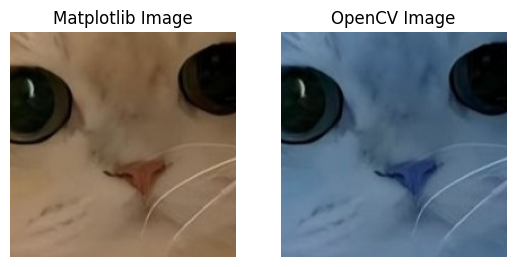

In [6]:
### START CODE HERE ###
img = 'asset/pic.jpg'
mpl_img = plt.imread(img)
cv_img = cv2.imread(img)

fig, axs = plt.subplots(1, 2)
axs[0].imshow(mpl_img)
axs[0].set_title('Matplotlib Image')
axs[0].axis('off')

axs[1].imshow(cv_img)
axs[1].set_title('OpenCV Image')
axs[1].axis('off')


plt.show()
### END CODE HERE ###

### Opencv [BGR] vs Matplotlib [RGB]
Examine the grayscale representations of individual color channels for each library.
***PLEASE use direct slicing method***

<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

- The output should resemble this, but not be identical

![image.png](https://raw.githubusercontent.com/Digital-Image-Processing-Laboratory/Image-Processing-Course-2025/main/Lab1_image-representation/asset/1-2.png)

</details>

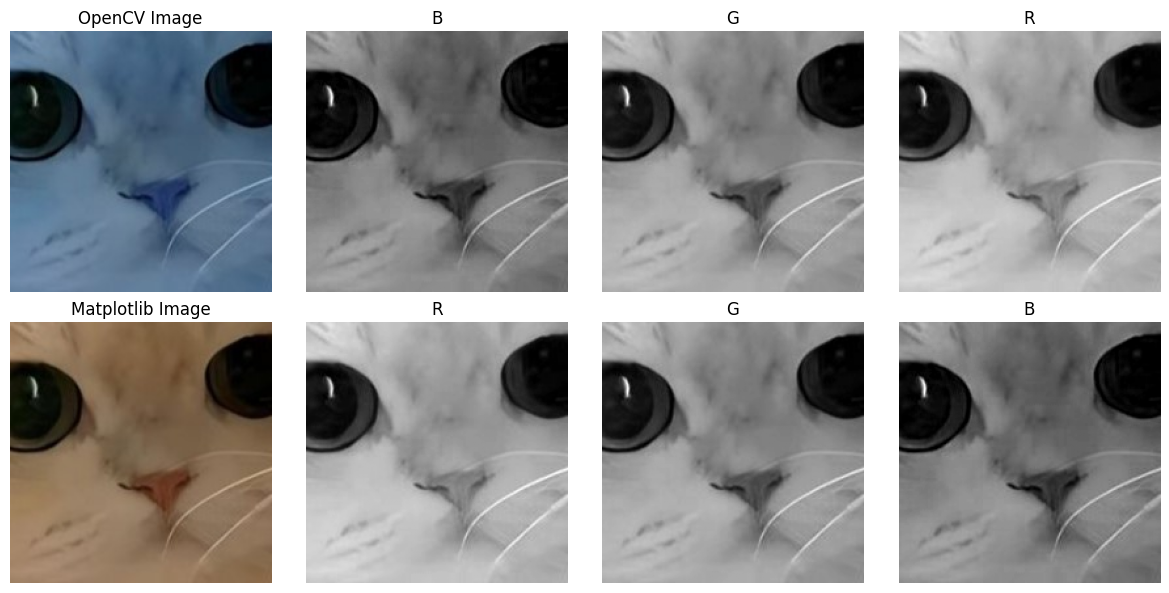

In [7]:
### START CODE HERE ###
fig, axs = plt.subplots(2, 4, figsize=(12, 6))

# OpenCV
axs[0, 0].imshow(cv_img)
axs[0, 0].set_title('OpenCV Image')
axs[0, 0].axis('off')

axs[0, 1].imshow(cv_img[:,:,0], cmap='gray')
axs[0, 1].set_title('B')
axs[0, 1].axis('off')

axs[0, 2].imshow(cv_img[:,:,1], cmap='gray')
axs[0, 2].set_title('G')
axs[0, 2].axis('off')

axs[0, 3].imshow(cv_img[:,:,2], cmap='gray')
axs[0, 3].set_title('R')
axs[0, 3].axis('off')

# Matplotlib
axs[1, 0].imshow(mpl_img)
axs[1, 0].set_title('Matplotlib Image')
axs[1, 0].axis('off')

axs[1, 1].imshow(mpl_img[:,:,0], cmap='gray')
axs[1, 1].set_title('R')
axs[1, 1].axis('off')

axs[1, 2].imshow(mpl_img[:,:,1], cmap='gray')
axs[1, 2].set_title('G')
axs[1, 2].axis('off')

axs[1, 3].imshow(mpl_img[:,:,2], cmap='gray')
axs[1, 3].set_title('B')
axs[1, 3].axis('off')

plt.tight_layout()
plt.show()
### END CODE HERE ###

##### Opencv BGR -> RGB
Compare the images displayed after conversion using both methods (`cv2.cvtColor()` and `direct slicing`).

Use `cv2.cvtColor()`
<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

- The output should resemble this, but not be identical

![image-3.png](https://raw.githubusercontent.com/Digital-Image-Processing-Laboratory/Image-Processing-Course-2025/main/Lab1_image-representation/asset/1-3.png)

</details>

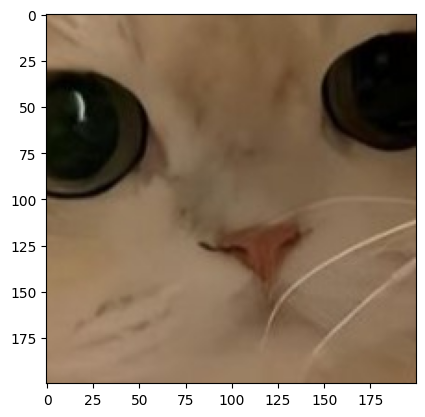

In [8]:
### START CODE HERE ###
img = 'asset/pic.jpg'
cv_img = cv2.imread(img)
cv_img_rgb = cv2.cvtColor(cv_img, cv2.COLOR_BGR2RGB)
fig, ax = plt.subplots(1, 1)
ax.imshow(cv_img_rgb)

plt.show()
### END CODE HERE ###

Use `direct slicing method (array[...])`
<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

- The output should resemble this, but not be identical

![image-3.png](https://raw.githubusercontent.com/Digital-Image-Processing-Laboratory/Image-Processing-Course-2025/main/Lab1_image-representation/asset/1-4.png)

</details>

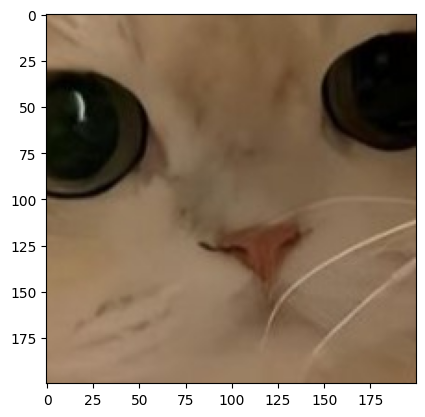

In [9]:
### START CODE HERE ###
img = 'asset/pic.jpg'
cv_img = cv2.imread(img)
cv_img_rgb_sliced = cv_img[:,:,[2,1,0]]

fig, ax = plt.subplots(1, 1)
ax.imshow(cv_img_rgb_sliced)

plt.show()
### END CODE HERE ###

## **Image Reshape**

Implement the code to tranform the image from ***channels last (HWC) to channels first (CHW)***.<br>

**NumPy Transpose**<br>
Compare the difference between :
- `np.transpose(<img>)`
- `np.transpose(<img>,(2,0,1))`

<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

- The output should resemble this, but not be identical
- The image display only the Red channel.

```
np.transpose(mpl_img) => Before : (3265, 4898, 3) | After : (3, 4898, 3265)
np.transpose(mpl_img,(2,0,1)) => Before : (3265, 4898, 3) | After : (3, 3265, 4898)
```

![image.png](https://raw.githubusercontent.com/Digital-Image-Processing-Laboratory/Image-Processing-Course-2025/main/Lab1_image-representation/asset/1-5.png)

</details>

np.transpose(mpl_img) => Before : (240, 630, 4) | After : (4, 630, 240)
np.transpose(mpl_img,(2,0,1)) => Before : (240, 630, 4) | After : (4, 240, 630)


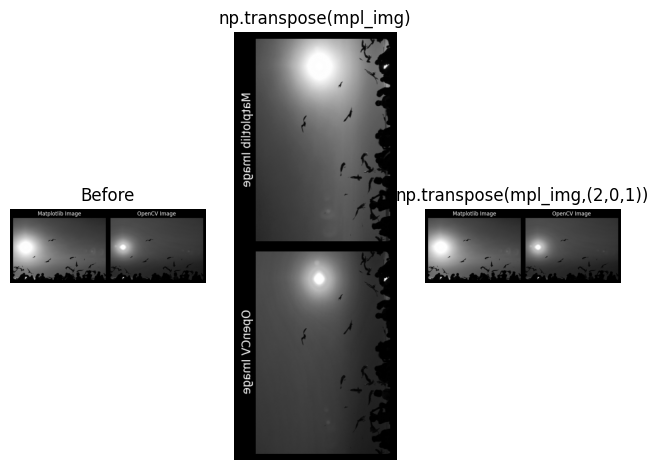

In [72]:
### START CODE HERE ###
img = 'asset/1-1.png'
mpl_img = mpimg.imread(img)

reshaped_trade_trans = np.transpose(mpl_img)
print('np.transpose(mpl_img) => Before :',mpl_img.shape,'| After :',reshaped_trade_trans.shape)


reshaped_trans = np.transpose(mpl_img,(2,0,1))
print('np.transpose(mpl_img,(2,0,1)) => Before :',mpl_img.shape,'| After :',reshaped_trans.shape)


fig, axs = plt.subplots(1, 3)

axs[0].imshow(mpl_img[:,:,0], cmap='gray')
axs[0].set_title('Before')
axs[0].axis('off')

axs[1].imshow(reshaped_trade_trans[0], cmap='gray')
axs[1].set_title('np.transpose(mpl_img)')
axs[1].axis('off')

axs[2].imshow(reshaped_trans[0], cmap='gray')
axs[2].set_title('np.transpose(mpl_img,(2,0,1))')
axs[2].axis('off')

plt.tight_layout()
plt.show()
### END CODE HERE ###

If you code work properly, the cell below should run without error.

In [73]:
assert reshaped_trade_trans.shape == (mpl_img.shape[2], mpl_img.shape[1], mpl_img.shape[0]), \
    f"Error: Shape mismatch after traditional transpose. Expected {(mpl_img.shape[1], mpl_img.shape[0], mpl_img.shape[2])}, got {reshaped_trade_trans.shape}"
print("Assertion for traditional transpose passed successfully.")

assert reshaped_trans.shape == (mpl_img.shape[2], mpl_img.shape[0], mpl_img.shape[1]), \
    f"Error: Shape mismatch after specified transpose. Expected {(mpl_img.shape[2], mpl_img.shape[0], mpl_img.shape[1])}, got {reshaped_trans.shape}"
print("Assertion for specified transpose passed successfully.")

Assertion for traditional transpose passed successfully.
Assertion for specified transpose passed successfully.


**NumPy Reshape**

Use `np.reshape()`. Ensure the new shape is (3, height, width).
<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

- The output should resemble this, but not be identical
- The image display only the Red channel.

```
Before : (3265, 4898, 3) | After : (3, 3265, 4898)
```

![image.png](https://raw.githubusercontent.com/Digital-Image-Processing-Laboratory/Image-Processing-Course-2025/main/Lab1_image-representation/asset/1-6.png)

</details>

Before : (240, 630, 4) | After : (4, 240, 630)


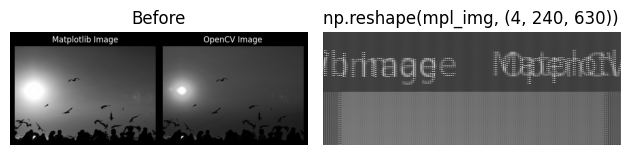

In [13]:
### START CODE HERE ###
img = 'asset/1-1.png'
mpl_img = mpimg.imread(img)
reshaped_reshape = np.reshape(mpl_img, (4, 240, 630))
print('Before :',mpl_img.shape,'| After :',reshaped_reshape.shape)

fig, axs = plt.subplots(1, 2)
axs[0].imshow(mpl_img[:,:,0], cmap='gray')
axs[0].set_title('Before')
axs[0].axis('off')

axs[1].imshow(reshaped_reshape[0], cmap='gray')
axs[1].set_title('np.reshape(mpl_img, (4, 240, 630))')
axs[1].axis('off')

plt.tight_layout()
plt.show()
### END CODE HERE ###

If you code work properly, the cell below should run without error.

In [14]:
assert reshaped_reshape.shape == (mpl_img.shape[2], mpl_img.shape[0], mpl_img.shape[1]), \
    f"Error: Shape mismatch after reshape. Expected {(mpl_img.shape[2], mpl_img.shape[0], mpl_img.shape[1])}, got {reshaped_reshape.shape}"
print("Assertion for reshape passed successfully.")

Assertion for reshape passed successfully.


**NumPy moveaxis**

Use `np.moveaxis` to move the channels axis from the last position to the first.
<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

- The output should resemble this, but not be identical
- The image display only the Red channel.

```
Before : (3265, 4898, 3) | After : (3, 3265, 4898)
```

![image.png](https://raw.githubusercontent.com/Digital-Image-Processing-Laboratory/Image-Processing-Course-2025/main/Lab1_image-representation/asset/1-7.png)

</details>

Before : (240, 630, 4) | After : (4, 240, 630)


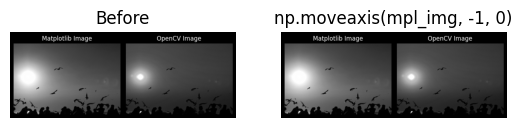

In [22]:
### START CODE HERE ###
img = 'asset/1-1.png'
mpl_img = mpimg.imread(img)
reshaped_mvx = np.moveaxis(mpl_img, -1, 0)
print('Before :',mpl_img.shape,'| After :',reshaped_mvx.shape)

fig, axs = plt.subplots(1, 2)
axs[0].imshow(mpl_img[:,:,0], cmap='gray')
axs[0].set_title('Before')
axs[0].axis('off')

axs[1].imshow(reshaped_mvx[0], cmap='gray')
axs[1].set_title('np.moveaxis(mpl_img, -1, 0)')
axs[1].axis('off')
plt.show()

### END CODE HERE ###

If you code work properly, the cell below should run without error.

In [23]:
assert reshaped_mvx.shape == (mpl_img.shape[2], mpl_img.shape[0], mpl_img.shape[1]), \
    f"Error: Shape mismatch after np.moveaxis. Expected {(mpl_img.shape[2], mpl_img.shape[0], mpl_img.shape[1])}, got {reshaped_mvx.shape}"
print("Assertion for np.moveaxis passed successfully.")

Assertion for np.moveaxis passed successfully.


## **Reduce Bit Depth using Quantization**
In this part, you will explore how to reduce the bit depth of an image using quantization. Quantization is a technique used to map pixel values from a continuous range to a smaller set of discrete values, effectively reducing the number of bits used to represent each pixel.
$$
\begin{align*}
Q_{level} &= 2^{bit dept-1}\\
Q &= floor(NormValue(S_i) * Q_{level})\\
Q &= floor((\frac{S_i-S_{min}}{S_{max}-S_{min}})*Q_{level})
\end{align*}
$$

Please complete the function below.

<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

- The output should resemble this, but not be identical

![image.png](https://raw.githubusercontent.com/Digital-Image-Processing-Laboratory/Image-Processing-Course-2025/main/Lab1_image-representation/asset/1-8.png)

</details>

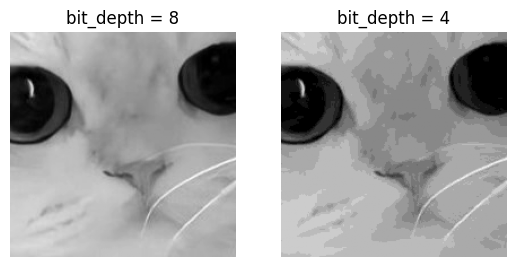

In [6]:
### START CODE HERE ###
img = 'asset/pic.jpg'
mpl_img = plt.imread(img)
def quantize(img, bit_depth):
    """
    Quantizes the image to a specified bit depth.
    
    Parameters:
    img (numpy.ndarray): Input image.
    bit_depth (int): Bit depth for quantization.
    
    Returns:
    numpy.ndarray: Quantized image.
    """
    if img is None:
        return None
    
    # Calculate quantization level (max value for given bit depth)
    Q_level = 2**bit_depth - 1
    
    # Normalize the image to [0, 1] range
    img_min = np.min(img)
    img_max = np.max(img)
    normalized = (img - img_min) / (img_max - img_min)
    
    # Quantize and convert to appropriate data type
    quantized = np.floor(normalized * Q_level)
    
    # Convert to uint8 for 8-bit or uint16 for higher bit depths
    if bit_depth <= 8:
        return quantized.astype(np.uint8)
    else:
        return quantized.astype(np.uint16)
quantized_img_8 = quantize(mpl_img, 8)
quantized_img_4 = quantize(mpl_img, 4)
fig, axs = plt.subplots(1, 2)
axs[0].imshow(quantized_img_8[:,:,0], cmap='gray')
axs[0].set_title('bit_depth = 8')
axs[0].axis('off')

axs[1].imshow(quantized_img_4[:,:,0], cmap='gray')
axs[1].set_title('bit_depth = 4')
axs[1].axis('off')

plt.show()


### END CODE HERE ###

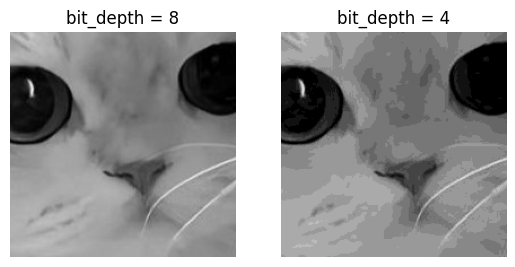

In [7]:
### START CODE HERE ###
cv_img = cv2.imread(img)
gray_img = cv2.cvtColor(cv_img, cv2.COLOR_RGB2GRAY)
bd8 = quantize(gray_img, 8)
bd4 = quantize(gray_img, 4)

fig, axs = plt.subplots(1, 2)
axs[0].imshow(bd8, cmap='gray')
axs[0].set_title('bit_depth = 8')
axs[0].axis('off')

axs[1].imshow(bd4, cmap='gray')
axs[1].set_title('bit_depth = 4')
axs[1].axis('off')

plt.show()

### END CODE HERE ###

If you code work properly, the cell below should run without error.

In [8]:
max_value_bd8 = 2**8 - 1
max_value_bd4 = 2**4 - 1

assert np.min(bd8) >= 0 and np.max(bd8) <= max_value_bd8, \
    f"Error: Values in bd8 are out of expected range 0-{max_value_bd8}. Got min={np.min(bd8)}, max={np.max(bd8)}"
assert np.min(bd4) >= 0 and np.max(bd4) <= max_value_bd4, \
    f"Error: Values in bd4 are out of expected range 0-{max_value_bd4}. Got min={np.min(bd4)}, max={np.max(bd4)}"


## **3D Image Surface**

use `plot_surface()` to plot the image in 3D space, where the z-axis represents the normalized pixel intensity values.

<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

- The output should resemble this, but not be identical

![3d-surface.gif](https://raw.githubusercontent.com/Digital-Image-Processing-Laboratory/Image-Processing-Course-2025/main/Lab1_image-representation/asset/3d-surface.gif)

</details>

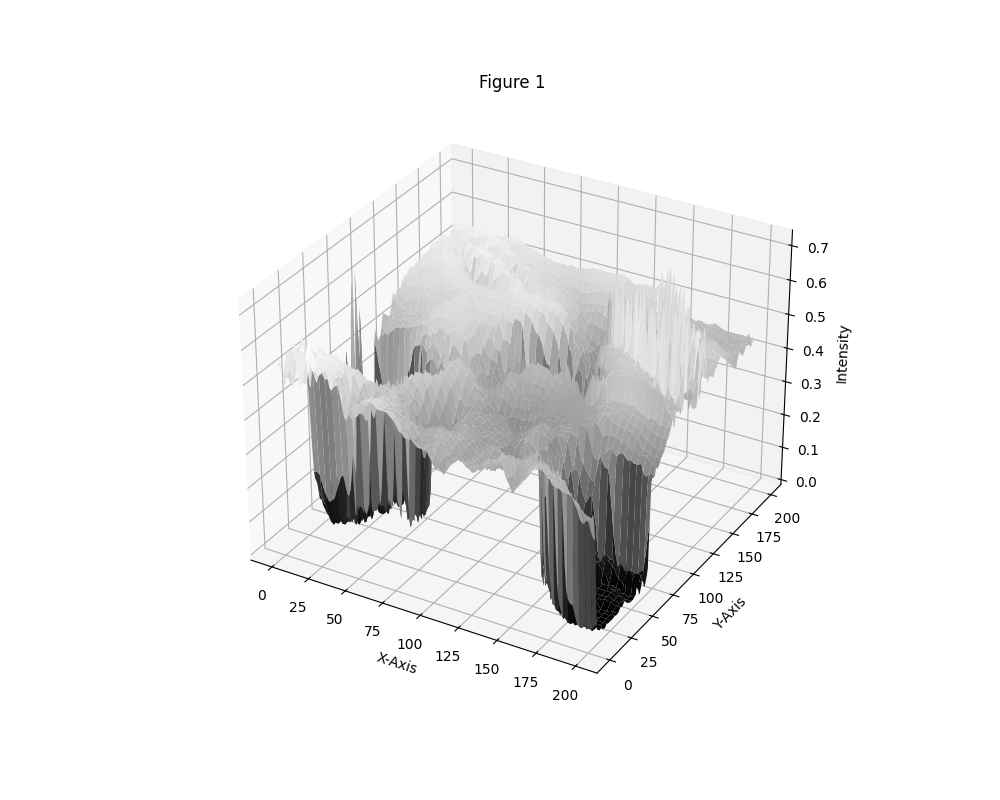

In [3]:
%matplotlib ipympl

### START CODE HERE ###
img = 'asset/pic.jpg'
cv_img = cv2.imread(img)
cv_img_gray = cv2.cvtColor(cv_img, cv2.COLOR_BGR2GRAY)

# Create coordinate arrays for the surface plot
h, w = cv_img_gray.shape
x = np.arange(w)
y = np.arange(h)
X, Y = np.meshgrid(x, y)

# Normalize the grayscale values to [0, 1] for Z coordinates
Z = cv_img_gray.astype(np.float32) / 255.0

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the 3D surface
ax.plot_surface(X, Y, Z, cmap='gray')

ax.set_xlabel('X-Axis')
ax.set_ylabel('Y-Axis')
ax.set_zlabel('Intensity')
ax.set_title('Figure 1')

plt.show()
### END CODE HERE ###


---

## **Question**
1. How to perform manual color conversion (using only array slicing) of image array read from openCV (BGR) to RGB?
2. How to perform manual conversion (using only array slicing) of image array from channel last to channel first?
3. Why does np.reshape destroy the image integrity?

In [59]:
# Answers to the questions:

print("1. How to perform manual color conversion (using only array slicing) of image array read from openCV (BGR) to RGB?")
print("Answer: Use array slicing to reverse the channel order: img_rgb = img_bgr[:,:,[2,1,0]]")
print("This swaps the Blue and Red channels while keeping Green in the middle.")
print()

print("2. How to perform manual conversion (using only array slicing) of image array from channel last to channel first?")
print("Answer: Use np.transpose() with axis specification: img_chw = np.transpose(img_hwc, (2,0,1))")
print("This moves the channel dimension from last position to first position.")
print()

print("3. Why does np.reshape destroy the image integrity?")
print("Answer: np.reshape() flattens and reshapes the array without considering the spatial")
print("relationships between pixels. It treats the image data as a 1D array and redistributes")
print("the values into a new shape, which breaks the 2D spatial structure of the image.")
print("Unlike transpose operations that preserve spatial relationships by reordering dimensions,")
print("reshape fundamentally changes how pixel values are arranged spatially.")

1. How to perform manual color conversion (using only array slicing) of image array read from openCV (BGR) to RGB?
Answer: Use array slicing to reverse the channel order: img_rgb = img_bgr[:,:,[2,1,0]]
This swaps the Blue and Red channels while keeping Green in the middle.

2. How to perform manual conversion (using only array slicing) of image array from channel last to channel first?
Answer: Use np.transpose() with axis specification: img_chw = np.transpose(img_hwc, (2,0,1))
This moves the channel dimension from last position to first position.

3. Why does np.reshape destroy the image integrity?
Answer: np.reshape() flattens and reshapes the array without considering the spatial
relationships between pixels. It treats the image data as a 1D array and redistributes
the values into a new shape, which breaks the 2D spatial structure of the image.
Unlike transpose operations that preserve spatial relationships by reordering dimensions,
reshape fundamentally changes how pixel values are 